In [1]:
import pandas as pd
import seaborn as sns
import os
import re

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
def get_local_csvs(directory="."):
    file_list = []
    for filename in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, filename)):
            if filename.endswith(".csv"):
                file_list.append(filename)
    return file_list

directory_path = "."
files = get_local_csvs(directory_path)

print("List of files in the directory:")
for file in files:
    print(file)

List of files in the directory:
Simple_Base Decision Tree_ActualVSPred_RMSE_8.997.csv
Simple_XGBoost Best Model_ActualVSPred_RMSE_7.421.csv
Simple_Tuned Decision Tree_ActualVSPred_RMSE_8.0885.csv
Simple_XGBoost Best Model_ActualVSPred_RMSE_6.3199.csv
Simple_XGBoost Base Model_ActualVSPred_RMSE_7.4708.csv
Simple_XGBoost Best Model_ActualVSPred_RMSE_6.3181.csv
Simple_XGBoost Best Model_ActualVSPred_RMSE_7.4413.csv
Simple_Random Forest Initial Model_ActualVSPred_RMSE_6.8805.csv
Simple_Random Forest Best Model_ActualVSPred_RMSE_6.8805.csv


In [3]:
def read_csvs():
    """
    Import each of the files and merge them into a single dataframe
    """
    pattern = r"_ActualVSPred_RMSE_\d+(\.\d+)?"
    
    csv_list = get_local_csvs(".")
    dataframe_list = []
    for i in csv_list:
        dataframe = pd.read_csv(i)
        dataframe["Model"] = f'{re.sub(pattern, "", (i.replace(" ", "_"))).replace(".csv", "")}'
        dataframe_list.append(dataframe)
    
    df = pd.concat(dataframe_list)
    df.rename(columns={"predictions":"prediction"}, inplace=True)
    return df
    

In [4]:
actuals_vs_predictions_tree = read_csvs()

In [5]:
actuals_vs_predictions_tree

,actual,prediction,Model
0,1.915364,1.918451,Simple_Base_Decision_Tree
1,42.192954,43.101828,Simple_Base_Decision_Tree
2,0.342828,0.342654,Simple_Base_Decision_Tree
3,1.887241,1.889281,Simple_Base_Decision_Tree
4,0.000000,0.000000,Simple_Base_Decision_Tree
...,...,...,...
1327,16.088034,15.872868,Simple_Random_Forest_Best_Model
1328,2.291868,2.269025,Simple_Random_Forest_Best_Model
1329,10.681935,10.740187,Simple_Random_Forest_Best_Model
1330,21.724962,17.815816,Simple_Random_Forest_Best_Model


[Text(0.5, 1.0, 'Predictions - Fentanyl')]

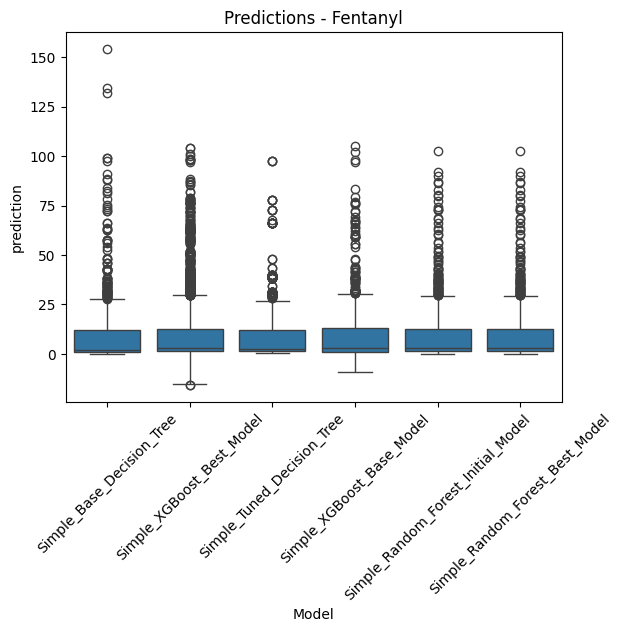

In [6]:
preds_boxplot = sns.boxplot(actuals_vs_predictions_tree, x="Model", y="prediction")
for item in preds_boxplot.get_xticklabels():
    item.set_rotation(45)

title = 'Predictions - Fentanyl'
preds_boxplot.set(title=title)


[Text(0.5, 1.0, 'Actuals - Fentanyl')]

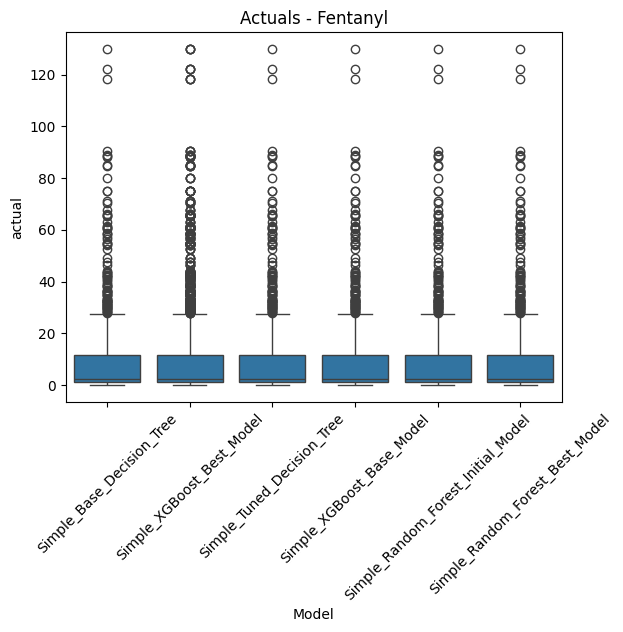

In [7]:
actual_boxplot = sns.boxplot(actuals_vs_predictions_tree, x="Model", y="actual")
for item in actual_boxplot.get_xticklabels():
    item.set_rotation(45)

title = 'Actuals - Fentanyl'
actual_boxplot.set(title=title)

In [8]:
y_actual = list(actuals_vs_predictions_tree['actual'])
y_predicted = list(actuals_vs_predictions_tree['prediction'])

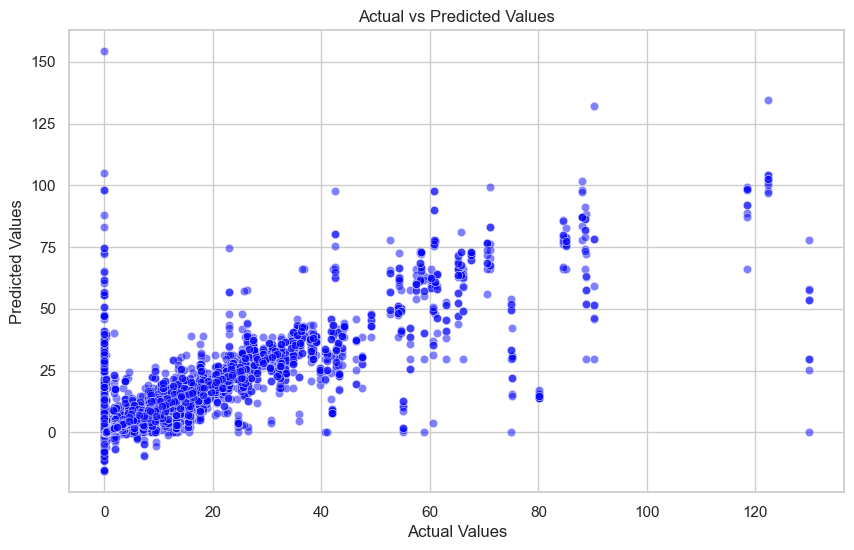

In [9]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_actual, y=y_predicted, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

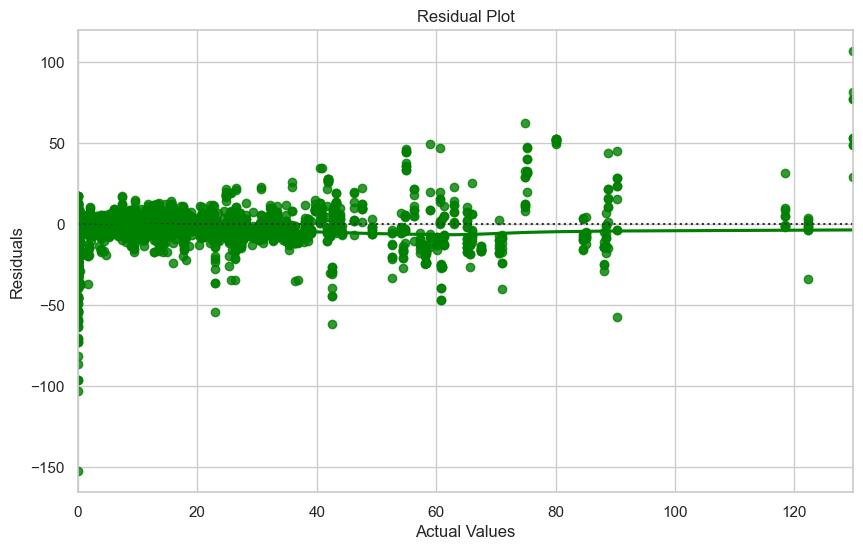

In [10]:
# Residual plot
residuals = np.array(y_actual) - np.array(y_predicted)
plt.figure(figsize=(10, 6))
sns.residplot(x=y_actual, y=residuals, lowess=True, color='green')
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

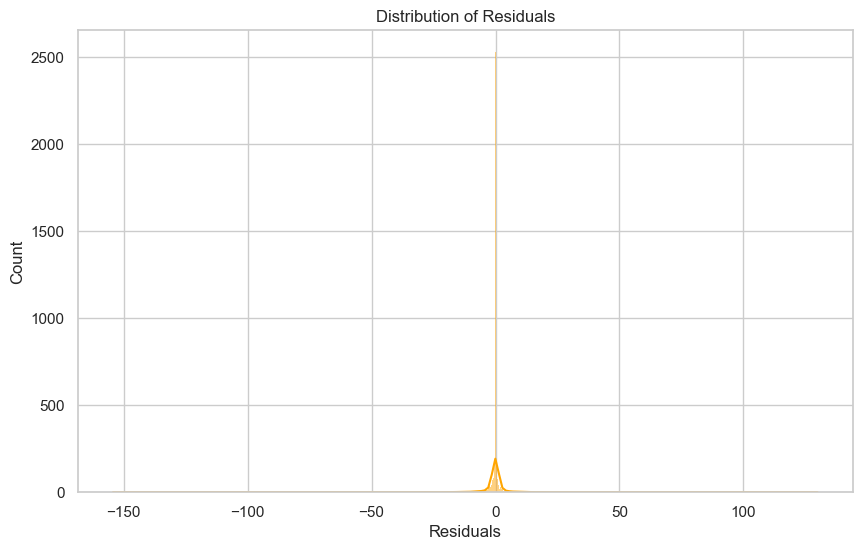

In [11]:
# Distribution plot of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='orange')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()